# 🎥Predictive Modelling and Risk Analysis of Cancer Severity and Survival Outcomes Using Machine Learning

## 🔍 Business Understanding

This project analyzes cancer patient data to support data-driven healthcare by predicting patient severity and 5-year survival. Using statistical and machine learning methods, it aims to explore correlations with risk factors, assess survival differences across cancer stages, and build models to predict severity levels and long-term survival outcomes.

This project aims to analyze and model cancer patient data to:

1. To compute and visualize the correlation between the Target Severity Score and continuous risk factors.

2. To investigate whether survival outcomes differ significantly across various cancer stages.

3. To predict whether a patient’s severity level is classified as High or Low based on clinical and lifestyle factors.

4. To predict whether a patient will survive more than 5 years after diagnosis.

## 🧠 Data Understanding

The Global Cancer Patients 2015–2024 dataset is a synthetic but realistic collection of cancer patient records, containing demographics, lifestyle and environmental risk factors, treatment details, cancer stage, survival duration, and a calculated severity score. It is intended for educational and analytical use, reflecting real-world patterns.

## 📊 Data Preparation

In [40]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, f_oneway, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
# utility function
from student import drop_columns

**Loading and Inspecting data**

In [41]:
#Loading the dataset and display the first few rows
df = pd.read_csv("global_cancer_patients_2015_2024.csv")
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [42]:
#Check for the columns in the dataframe
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [43]:
#Show the number of rows and columns in the dataset
print(f'The dataframe contains {df.shape[0]} rows')
print(f'The dataframe contains {df.shape[1]} columns')

The dataframe contains 50000 rows
The dataframe contains 15 columns


In [44]:
# Get the basic information and concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [45]:
#checking the summary statistics of the dataset
df.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


In [46]:
# Check for the duplicates in the dataframe 
df.duplicated().sum()

0

There are no duplicates in the dataframe so the dataframe will remain unchanged 

In [47]:
#Check for the data types of the columns in the dataframe
df.dtypes

Patient_ID                object
Age                        int64
Gender                    object
Country_Region            object
Year                       int64
Genetic_Risk             float64
Air_Pollution            float64
Alcohol_Use              float64
Smoking                  float64
Obesity_Level            float64
Cancer_Type               object
Cancer_Stage              object
Treatment_Cost_USD       float64
Survival_Years           float64
Target_Severity_Score    float64
dtype: object

In [48]:
# Checking for missing values in the dataset
df.isna().sum()

Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64

There aren't any missing values in the dataframe so the dataframe will remain unchanged .We now check for outliers in the dataframe.

In [49]:


# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Dictionary to store outlier indices per feature
outlier_indices = {}

# Loop through each numeric column to compute IQR and find outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outlier_indices[col] = outliers.index.tolist()
    
    print(f"Column: {col}")
    print(f"Number of outliers: {len(outliers)}")
    print("-" * 40)


Column: Age
Number of outliers: 0
----------------------------------------
Column: Year
Number of outliers: 0
----------------------------------------
Column: Genetic_Risk
Number of outliers: 0
----------------------------------------
Column: Air_Pollution
Number of outliers: 0
----------------------------------------
Column: Alcohol_Use
Number of outliers: 0
----------------------------------------
Column: Smoking
Number of outliers: 0
----------------------------------------
Column: Obesity_Level
Number of outliers: 0
----------------------------------------
Column: Treatment_Cost_USD
Number of outliers: 0
----------------------------------------
Column: Survival_Years
Number of outliers: 0
----------------------------------------
Column: Target_Severity_Score
Number of outliers: 151
----------------------------------------


There are **151 outliers** detected in the `Target_Severity_Score` column based on the IQR method, and they will be **dropped** to improve model reliability.


In [50]:
df = df[(df['Target_Severity_Score'] >= lower_bound) & (df['Target_Severity_Score'] <= upper_bound)]


In [51]:
#Checking agin to see the basic information of the dataset after dropping the outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49849 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             49849 non-null  object 
 1   Age                    49849 non-null  int64  
 2   Gender                 49849 non-null  object 
 3   Country_Region         49849 non-null  object 
 4   Year                   49849 non-null  int64  
 5   Genetic_Risk           49849 non-null  float64
 6   Air_Pollution          49849 non-null  float64
 7   Alcohol_Use            49849 non-null  float64
 8   Smoking                49849 non-null  float64
 9   Obesity_Level          49849 non-null  float64
 10  Cancer_Type            49849 non-null  object 
 11  Cancer_Stage           49849 non-null  object 
 12  Treatment_Cost_USD     49849 non-null  float64
 13  Survival_Years         49849 non-null  float64
 14  Target_Severity_Score  49849 non-null  float64
dtypes:

In [52]:
#Checking to see the shape of the dataframe after dropping the outliers
print(f'The dataframe now contains {df.shape[0]} rows after dropping outliers')
print(f'The dataframe now contains {df.shape[1]} columns after dropping outliers')

The dataframe now contains 49849 rows after dropping outliers
The dataframe now contains 15 columns after dropping outliers


In [53]:
#Dropping the irrelevant columns that are not needed for the analysis and modeling
drop_cols = ['Patient_ID', 'Country_Region', 'Year', 'Age','Gender','Treatment_Cost_USD']
df = drop_columns(df, drop_cols)

Below we are creating the `Severity_Score_Level` column that has  two categories: `High` and `Low`

In [54]:
# Create a new column called Severity_Level based on the condition
df['Severity_Score_Level'] = df['Target_Severity_Score'].apply(lambda x: 'High' if x > 5 else 'Low')
df.head()


,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Survival_Years,Target_Severity_Score,Severity_Score_Level
0,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,5.9,4.92,Low
1,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,4.7,4.65,Low
2,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,7.1,5.84,High
3,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,1.6,3.12,Low
4,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,2.9,3.62,Low


Below we are binarizing the `Target_Severity_Score` to a column named Severity_Target where patients with severity score greater or equal to the median get 1 (high severity) and patients with severity score less than the median get 0 (low severity).

In [55]:

threshold = df['Target_Severity_Score'].median()  

df['Severity_Target'] = (df['Target_Severity_Score'] >= threshold).astype(int)


In [56]:
df.columns

Index(['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking',
       'Obesity_Level', 'Cancer_Type', 'Cancer_Stage', 'Survival_Years',
       'Target_Severity_Score', 'Severity_Score_Level', 'Severity_Target'],
      dtype='object')

We create a column  `Survival_Score_Level` to categorize into > 5 and <= 5. This will help in understanding the severity levels in a more intuitive way.

In [57]:
# Create a new column 'Survival_Score_Level' based on Survival_Years
df['Survival_Score_Level'] = df['Survival_Years'].apply(lambda x: '>5' if x > 5 else '<=5')
df.head()

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Survival_Years,Target_Severity_Score,Severity_Score_Level,Severity_Target,Survival_Score_Level
0,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,5.9,4.92,Low,0,>5
1,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,4.7,4.65,Low,0,<=5
2,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,7.1,5.84,High,1,>5
3,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,1.6,3.12,Low,0,<=5
4,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,2.9,3.62,Low,0,<=5


Create the Target Column for the Survival Years and name it `Survival_Target`

If Survival_Years > 5: 1 (survived more than 5 years)

If Survival_Years <= 5: 0 (did not survive more than 5 years)

In [58]:
df['Survived_Target'] = (df['Survival_Years'] > 5).astype(int)


In [59]:
df.head()

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Survival_Years,Target_Severity_Score,Severity_Score_Level,Severity_Target,Survival_Score_Level,Survived_Target
0,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,5.9,4.92,Low,0,>5,1
1,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,4.7,4.65,Low,0,<=5,0
2,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,7.1,5.84,High,1,>5,1
3,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,1.6,3.12,Low,0,<=5,0
4,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,2.9,3.62,Low,0,<=5,0


In [60]:
#We check again to see the columns that we have
print(f'We now have {df.shape[1]} columns in the dataframe after dropping the irrelevant columns and feature engineering')

We now have 13 columns in the dataframe after dropping the irrelevant columns and feature engineering


**Data Visualizations**

In [61]:
# Calculate the average survival years by cancer stage
avg_survival_by_stage = df.groupby('Cancer_Stage')['Survival_Years'].mean()
print(avg_survival_by_stage)

Cancer_Stage
Stage 0      5.012644
Stage I      5.013586
Stage II     4.995588
Stage III    5.035590
Stage IV     4.970938
Name: Survival_Years, dtype: float64


The boxplot below shows the distribution of 'Survival_Years' for each 'Cancer_Stage'.
Interpretation:

- The box shows the interquartile range (IQR), where the middle 50% of survival years lie.
- Whiskers extend to show the range of most of the data, excluding outliers.
- By comparing boxes, you can see which cancer stages have higher or lower median survival, and how variable survival is within each stage.
- Stage 0 has a higher median and a taller box, patients in this stage tend to survive longer and have more variation in survival years compared to later stages.
- Stage IV has the lowest median survival years, indicating poorer outcomes for patients in this stage.

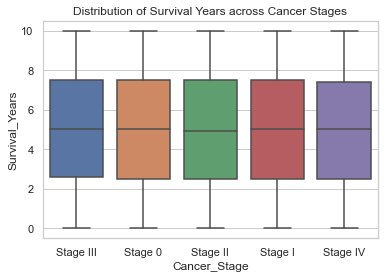

In [62]:
sns.boxplot(x='Cancer_Stage', y='Survival_Years', data=df)
plt.title("Distribution of Survival Years across Cancer Stages")
plt.show()


This plot below shows the distribution of patients based on the severity of their cancer, categorized as High or Low. It helps visualize how many patients fall into each severity level, providing insight into the overall severity burden within the dataset.

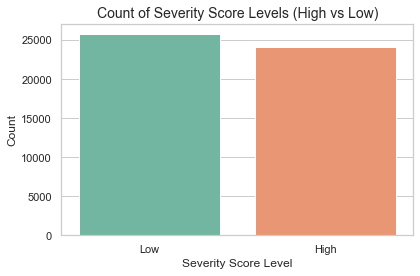

In [63]:


# Set the plot style
sns.set(style="whitegrid")

# Plot the count of High and Low severity levels
plt.figure(figsize=(6, 4))
sns.countplot(x='Severity_Score_Level', data=df, palette='Set2')

# Add titles and labels
plt.title('Count of Severity Score Levels (High vs Low)', fontsize=14)
plt.xlabel('Severity Score Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


From the countplot we can see that the low severity score is the most common then the high severity score meaning that most of the incidents are not severe.

In [64]:
#checking the value counts of the Severity score levels
df["Severity_Score_Level"].value_counts()

Low     25790
High    24059
Name: Severity_Score_Level, dtype: int64

In [65]:
# Checking to see the types of cancer in the dataset
print("Types of Cancer in the dataset are:")
print(df['Cancer_Type'].value_counts())


Types of Cancer in the dataset are:
Colon       6355
Prostate    6293
Leukemia    6248
Liver       6225
Skin        6208
Cervical    6200
Breast      6179
Lung        6141
Name: Cancer_Type, dtype: int64


We now plot a correlation heatmap to visualize the relationships between different features in the dataset. The heatmap shows how strongly each pair of features is correlated, with darker colors indicating stronger correlations.

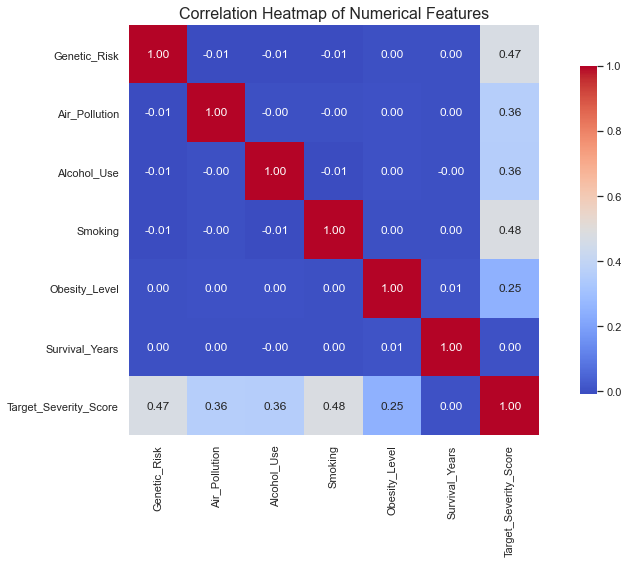

In [66]:
cols_for_corr = ['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Survival_Years', 'Target_Severity_Score']

plt.figure(figsize=(12, 8))
sns.heatmap(df[cols_for_corr].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()

From the heatmap we can see that the `Target_Severity_Score` has a positive correlation with `Genetic_Risk`,`Air_Pollution`,`Alcohol_Use`,`Smoking` and `Obesity_Levels` which means that as these factors increase, the severity score also tends to increase. This suggests that these are significant factors may contribute to higher cancer severity.

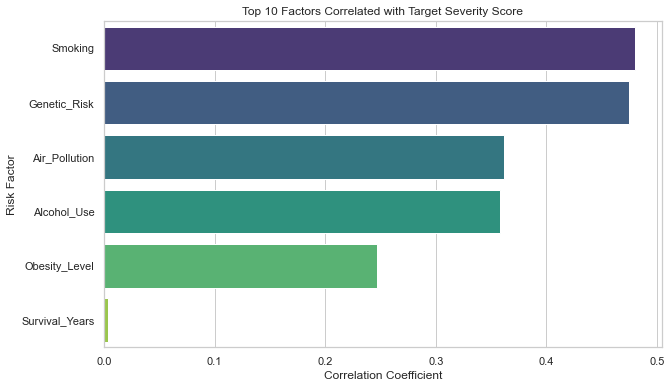

In [67]:
# Compute correlation matrix for relevant columns
corr_matrix = df[cols_for_corr].corr()

# Plotting the top 10 factors correlated with Target_Severity_Score
target_corr = corr_matrix['Target_Severity_Score'].drop('Target_Severity_Score').sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values[:10], y=target_corr.index[:10], palette='viridis')
plt.title('Top 10 Factors Correlated with Target Severity Score')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Risk Factor')
plt.show()



We create a new binary column in the dataframe and plot a countplot to visualize the survival status of patients based on their survival years.

```python

If a patient survived more than 5 years (Survival_Years > 5), it assigns a value of 1.

Otherwise (5 years or less), it assigns a value of 0.

So now:

1 = Patient survived more than 5 years

0 = Patient survived 5 years or less



In [68]:
df['Survived_5_Years'] = (df['Survival_Years'] > 5).astype(int)


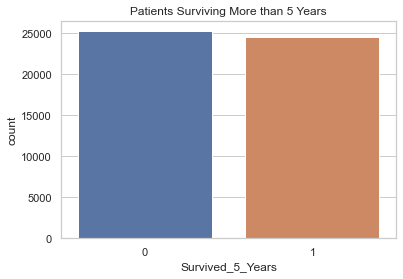

In [69]:
#Plotting the count of patients who survived more than 5 years
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived_5_Years', data=df)
plt.title("Patients Surviving More than 5 Years")
plt.show()


So from the countplot we can see that most of the patients survived less than 5 years which indicates that the dataset may contain a significant number of patients with poor prognosis or advanced cancer stages.

Finally, we plot a bar chart to visualize the average survival years for each cancer stage. This helps us understand how survival varies across different stages of cancer.

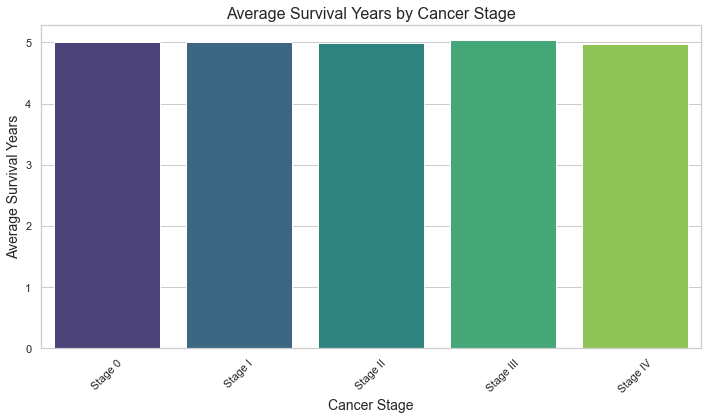

In [70]:
# we plot a bar chart to visualize the average survival years for each cancer stage
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_survival_by_stage.index, y=avg_survival_by_stage.values, palette='viridis')
plt.title('Average Survival Years by Cancer Stage', fontsize=16)
plt.xlabel('Cancer Stage', fontsize=14)
plt.ylabel('Average Survival Years', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The plot above shows that the average years across different stages does not vary significantly across different stages.

In [71]:
df['Survived_5_Years'] = (df['Survival_Years'] > 5).astype(int)

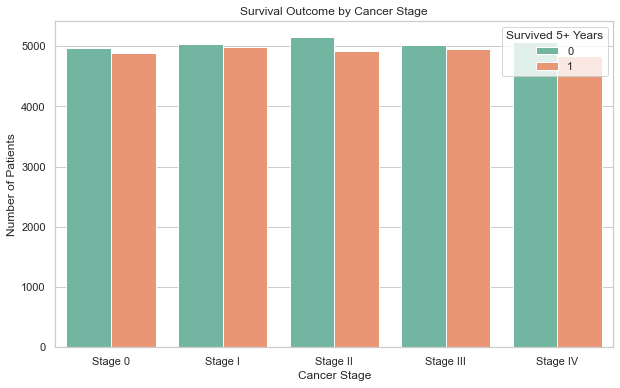

In [72]:
# Group by Cancer_Stage and Survived_5_Years, then plot
survival_stage = df.groupby(['Cancer_Stage', 'Survived_5_Years']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=survival_stage, x='Cancer_Stage', y='Count', hue='Survived_5_Years', palette='Set2')
plt.title('Survival Outcome by Cancer Stage')
plt.ylabel('Number of Patients')
plt.xlabel('Cancer Stage')
plt.legend(title='Survived 5+ Years')
plt.show()


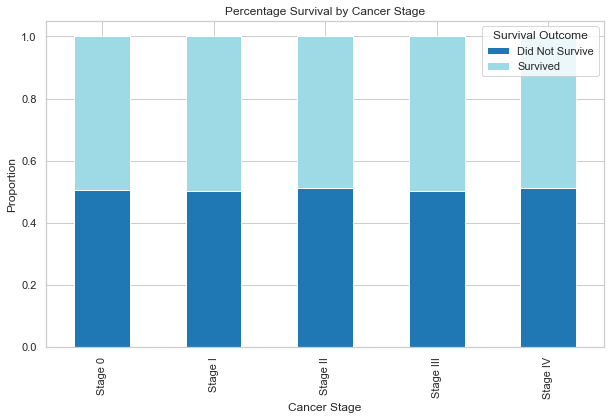

In [73]:

# Pivot the survival_stage DataFrame to get counts for each survival outcome per stage
stage_surv_pct = survival_stage.pivot(index='Cancer_Stage', columns='Survived_5_Years', values='Count')

# Normalize to get proportions
stage_surv_pct = stage_surv_pct.div(stage_surv_pct.sum(axis=1), axis=0)

stage_surv_pct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Percentage Survival by Cancer Stage')
plt.ylabel('Proportion')
plt.xlabel('Cancer Stage')
plt.legend(['Did Not Survive', 'Survived'], title='Survival Outcome')
plt.show()

The figures shows the proportion of patients who survived more than 5 years (Survived_5_Years=1) and those who did not (Survived_5_Years=0) for each cancer stage. The bars for each stage are stacked, making it easy to compare survival outcomes across stages. The proportions are very similar across all cancer stages, indicating that the likelihood of surviving more than 5 years does not vary significantly by cancer stage in this dataset.

In [74]:
df["Survived_5_Years"].value_counts()


0    25268
1    24581
Name: Survived_5_Years, dtype: int64

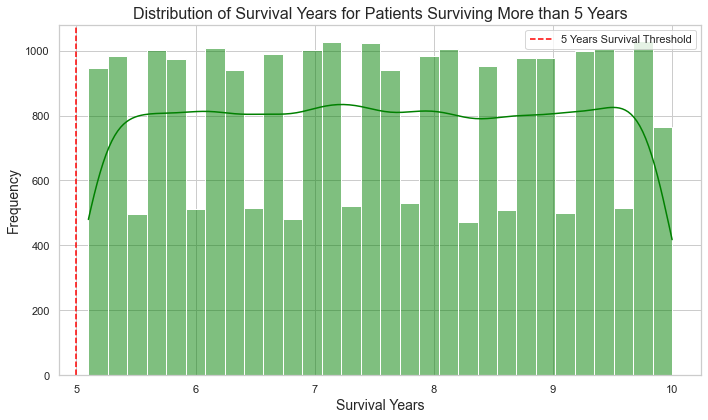

In [75]:
#We plot the distribution of survival years for patients who survived more than 5 years
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived_5_Years'] == 1]['Survival_Years'], bins=30, kde=True, color='green')
plt.title('Distribution of Survival Years for Patients Surviving More than 5 Years', fontsize=16)   
plt.xlabel('Survival Years', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(x=5, color='red', linestyle='--', label='5 Years Survival Threshold')
plt.legend()
plt.tight_layout()
plt.show();

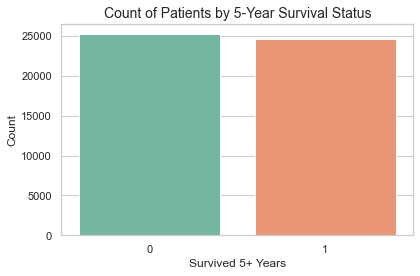

In [76]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived_5_Years', data=df, palette='Set2')
plt.title('Count of Patients by 5-Year Survival Status', fontsize=14)
plt.xlabel('Survived 5+ Years')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The plots above shows the distribution and counts of survival years for patients who survived after 5 years after diagnosis and less than 5 years after diagnosis. Most patients do not survive  with the frequency decreasing as survival years increase. The red dashed line at 5 years marks the threshold used to define long-term survival. This visualization highlights that while some patients achieve extended survival, the majority cluster closer to the 5-year mark, indicating that surviving significantly longer than 5 years is less common.

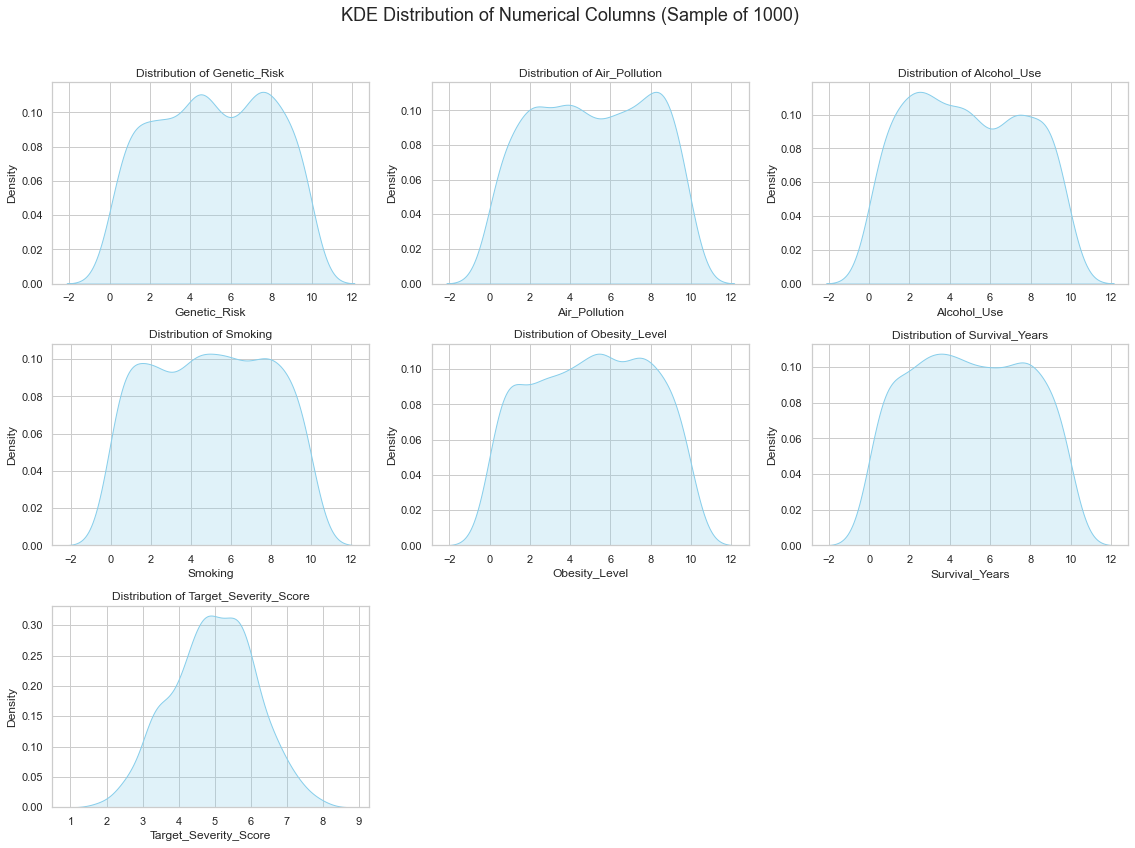

In [78]:
# KDE plot for the distribution of each numerical column in the sample
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(df_sample[col], fill=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
plt.suptitle('KDE Distribution of Numerical Columns (Sample of 1000)', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

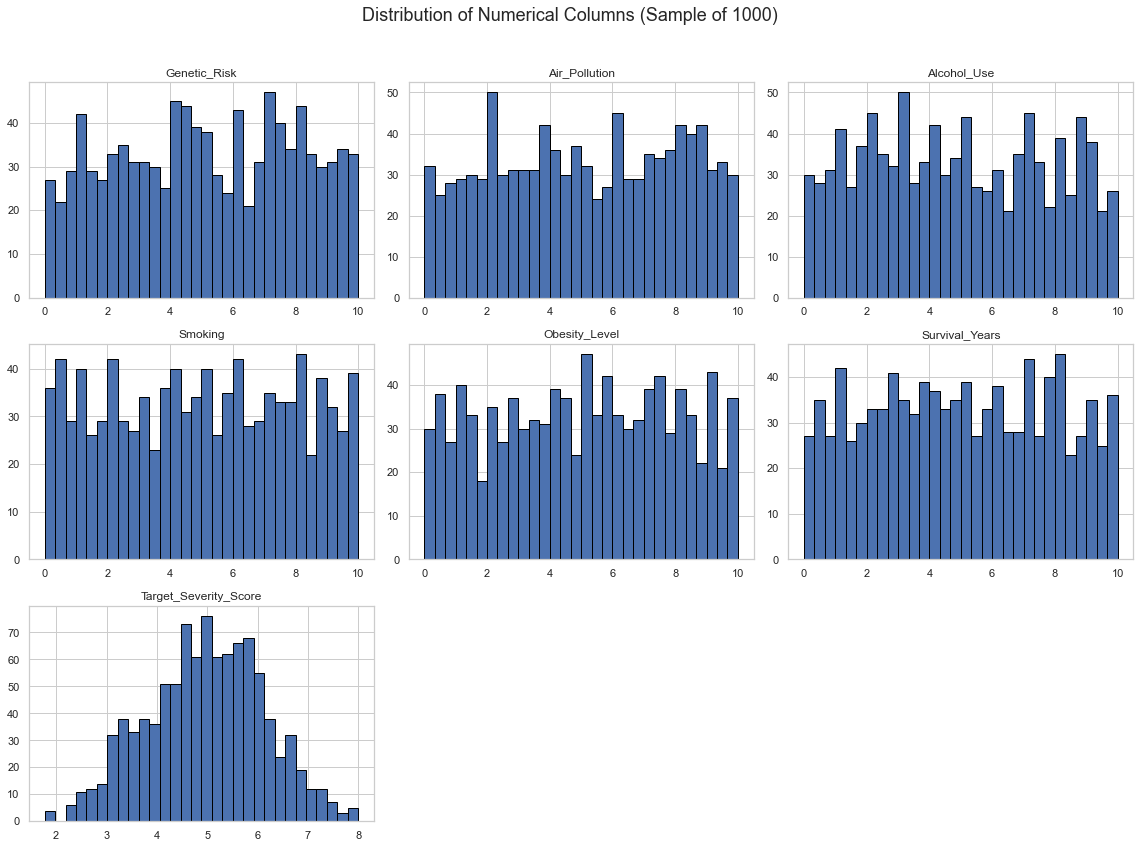

In [77]:
# Sample 1000 rows from the dataframe
df_sample = df.sample(n=1000, random_state=42)

# Select only numerical columns
num_cols = df_sample.select_dtypes(include=['float64', 'int64']).columns

# Plot the distribution of each numerical column
import matplotlib.pyplot as plt

df_sample[num_cols].hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numerical Columns (Sample of 1000)', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Plotting the distribution of all the numerical columns

**Hypothesis Testing**


In this section we will perform hypothesis testing to investigate whether there are significant differences in survival years across different cancer stages.This analysis investigates whether survival outcomes differ significantly across cancer stages .A One-Way ANOVA is conducted, followed by Tukey’s HSD post-hoc test if significant, to identify which cancer stages show meaningful differences in survival addressing the second objective of the project.


Null Hypothesis (H₀):
There is no significant difference in the median survival years among patients at different cancer stages.

Alternative Hypothesis (H₁):
There is a significant difference in the median survival years among patients at different cancer stages.

In [39]:
# Test normality within each stage
for stage in df['Cancer_Stage'].unique():
    stat, p = shapiro(df[df['Cancer_Stage'] == stage]['Survival_Years'])
    print(f'Shapiro test for {stage}: p-value={p}')

# Test homogeneity of variances
stat, p = levene(*[df[df['Cancer_Stage'] == stage]['Survival_Years'] for stage in df['Cancer_Stage'].unique()])
print(f'Levene test p-value={p}')

# If assumptions met:
stat, p = f_oneway(*[df[df['Cancer_Stage'] == stage]['Survival_Years'] for stage in df['Cancer_Stage'].unique()])
print(f'ANOVA p-value={p}')

# If significant, do post-hoc Tukey test
if p < 0.05:
    tukey = pairwise_tukeyhsd(endog=df['Survival_Years'], groups=df['Cancer_Stage'], alpha=0.05)
    print(tukey)


Shapiro test for Stage III: p-value=0.0
Shapiro test for Stage 0: p-value=0.0
Shapiro test for Stage II: p-value=0.0
Shapiro test for Stage I: p-value=0.0
Shapiro test for Stage IV: p-value=0.0
Levene test p-value=0.77905976235781
ANOVA p-value=0.5973811921947265


The shapiro wilk test reults show that the survival years are not normally distributed (p-value < 0.05), indicating that the assumption of normality is violated.So we will use the Kruskal-Wallis test instead of ANOVA to compare survival years across cancer stages.
The Anova pvalue is 0.59738 we fail to reject the null hypothesis, indicating that there is no significant difference in survival years across different cancer stages. 

In [40]:
from scipy.stats import kruskal

groups = [df[df['Cancer_Stage'] == stage]['Survival_Years'] for stage in df['Cancer_Stage'].unique()]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis test p-value = {p}")


Kruskal-Wallis test p-value = 0.598630361474873


From the Kruskal wallis test we now conclude that there is no significant difference in the survival years across different cancer stages.

In [41]:
df.dtypes

Genetic_Risk             float64
Air_Pollution            float64
Alcohol_Use              float64
Smoking                  float64
Obesity_Level            float64
Cancer_Type               object
Cancer_Stage              object
Survival_Years           float64
Target_Severity_Score    float64
Severity_Score_Level      object
Severity_Target            int32
Survival_Score_Level      object
Survived_Target            int32
Survived_5_Years           int32
dtype: object

We do pairplot to visualize the two target variables `Survived_Target` and `Severity_Target` to against the features in the dataset. This helps us understand how these two target variables relate to other features.

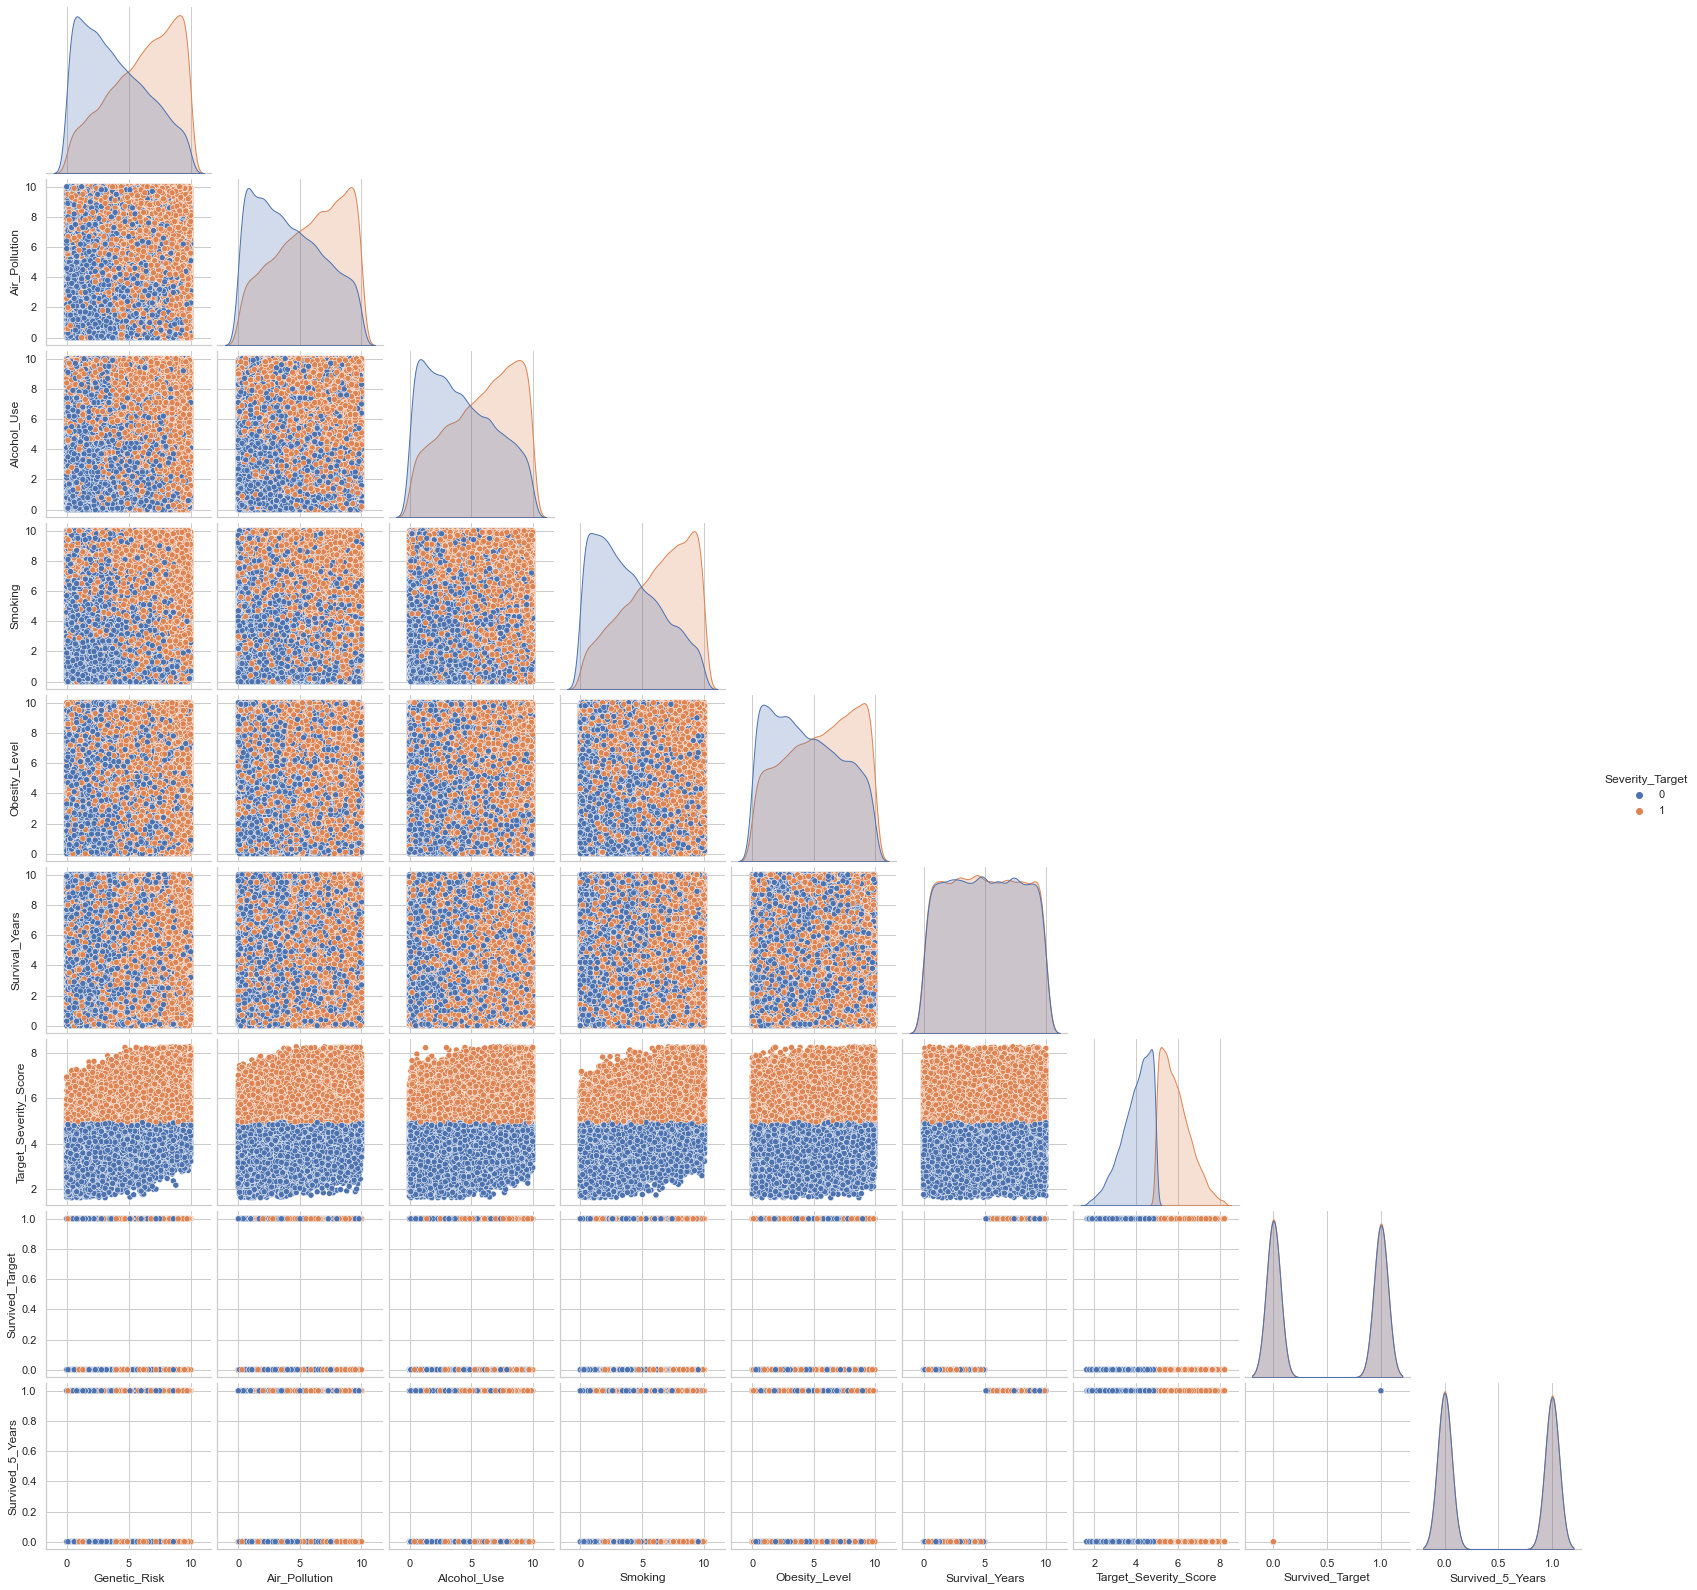

In [42]:
sns.pairplot(df,corner = True,hue = "Severity_Target");

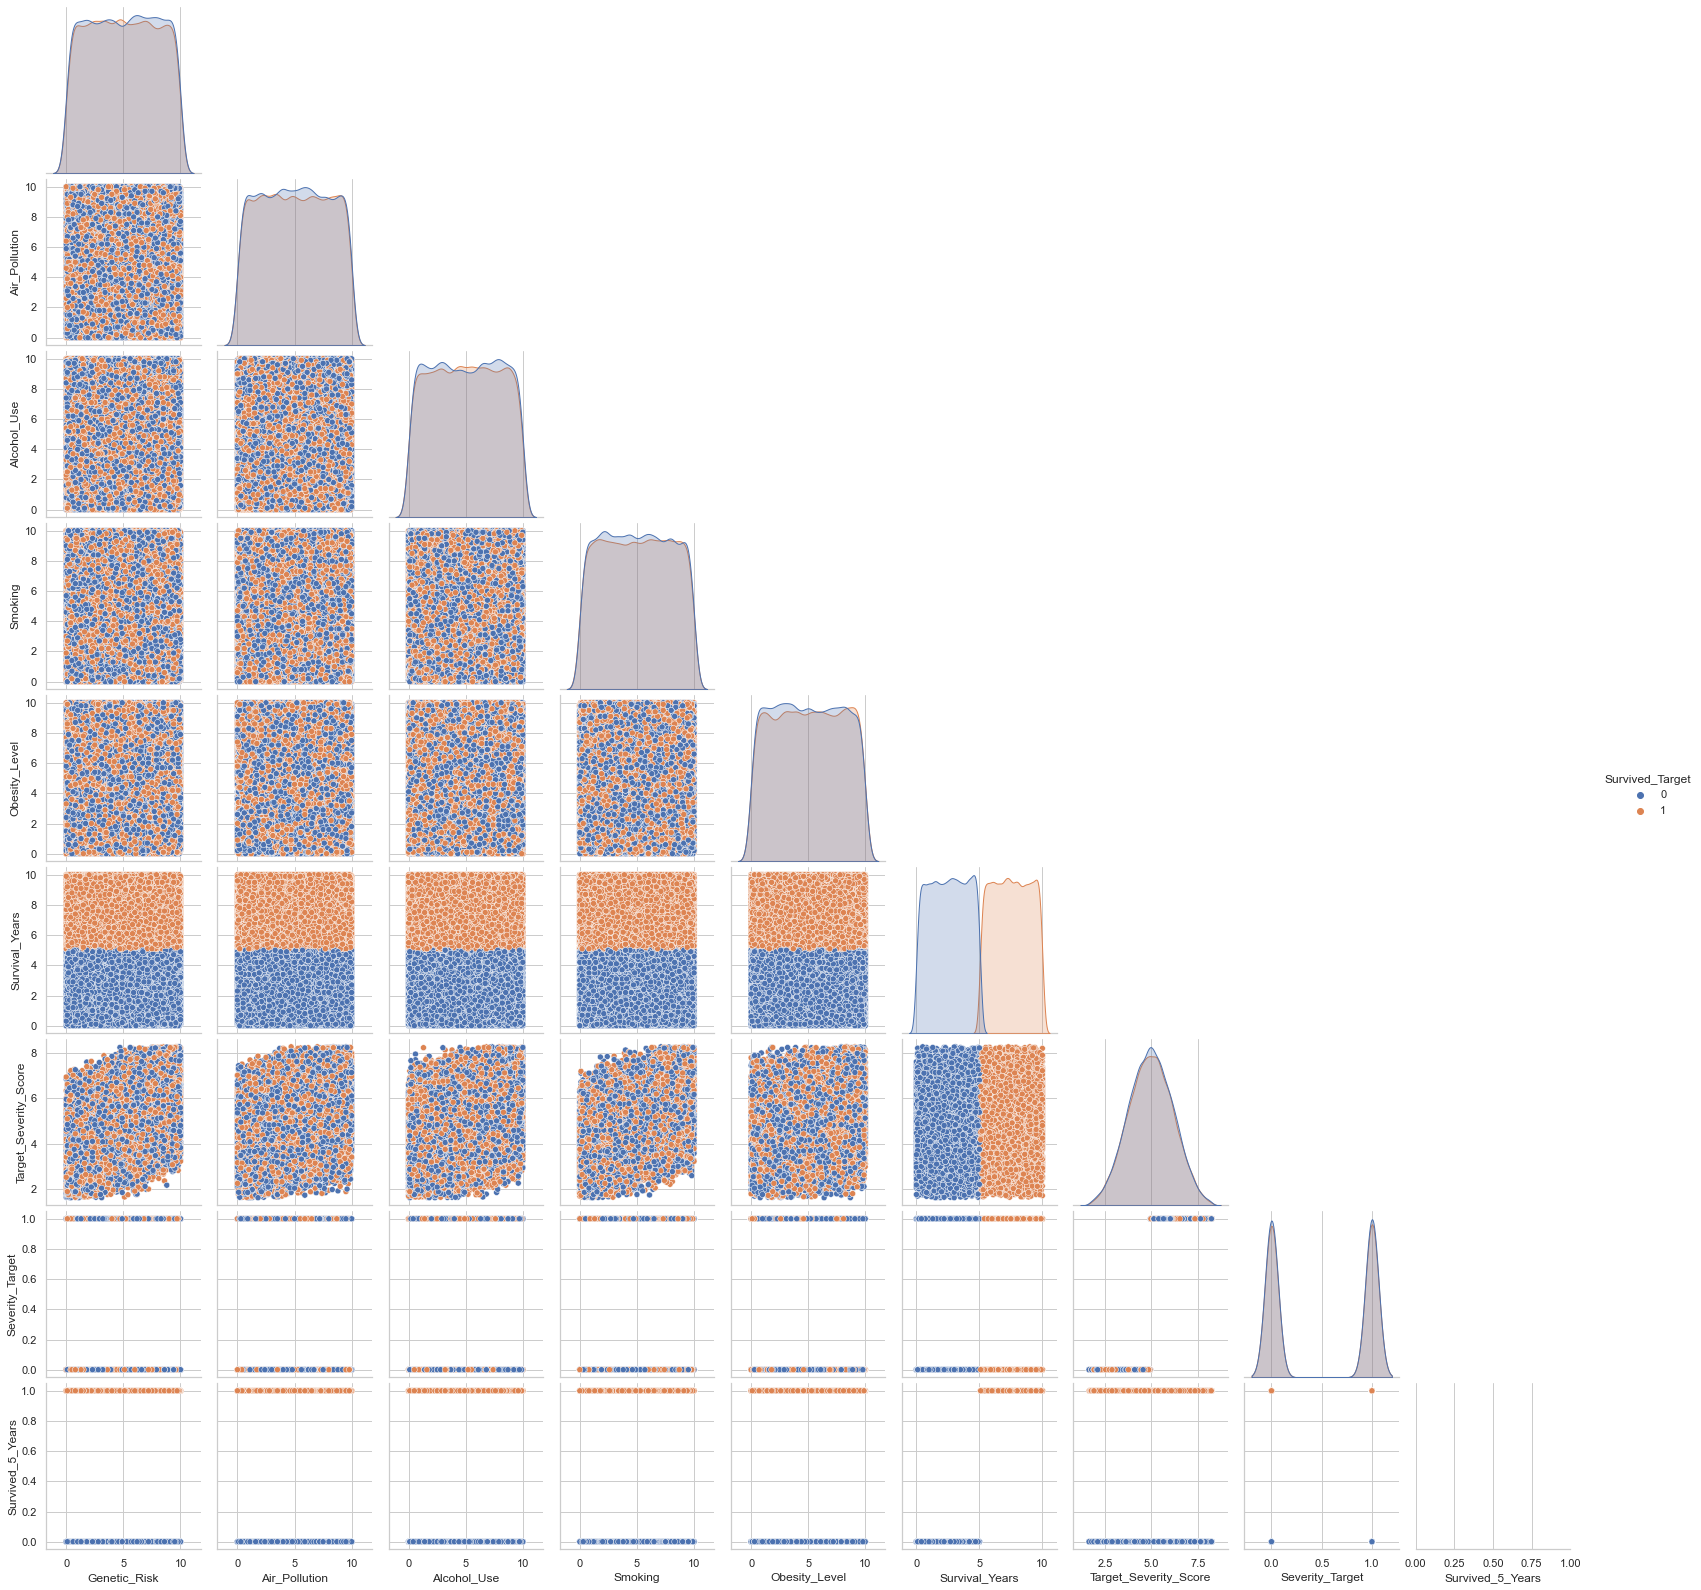

In [43]:
sns.pairplot(df,corner = True,hue = ("Survived_Target"));

The pairplots above show the relationships between the two target variables (`Survived_Target` and `Severity_Target`) and the features in the dataset. Each plot displays how one feature relates to another, colored by the target variable the plots showing the survival and severity status of patients.

Next we are going to do a one-hot encoding of the categorical variables in the dataset. This will convert categorical variables into a format that can be provided to machine learning algorithms to do a better job in prediction.

In [44]:
#Check the columns to know which ones to drop
df.columns

Index(['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking',
       'Obesity_Level', 'Cancer_Type', 'Cancer_Stage', 'Survival_Years',
       'Target_Severity_Score', 'Severity_Score_Level', 'Severity_Target',
       'Survival_Score_Level', 'Survived_Target', 'Survived_5_Years'],
      dtype='object')

In [45]:
#Saving the cleaned and processed DataFrame to a new CSV file
df.to_csv("cleaned_global_cancer_patients_2015_2024.csv", index=False)

In [46]:
#Dropping the columns that are not needed for modelling
cols = ['Target_Severity_Score', 'Survival_Years','Survival_Score_Level', 'Severity_Score_Level']
df1 = drop_columns(df, cols)
df1.head()

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Severity_Target,Survived_Target,Survived_5_Years
0,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,0,1,1
1,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,0,0,0
2,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,1,1,1
3,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,0,0,0
4,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,0,0,0


In [47]:

    # One-hot encoding for cancer stage on df1
df_encoded_stage = pd.get_dummies(df1, columns=['Cancer_Stage'], drop_first=True)
df_encoded_stage.head()

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Severity_Target,Survived_Target,Survived_5_Years,Cancer_Stage_Stage I,Cancer_Stage_Stage II,Cancer_Stage_Stage III,Cancer_Stage_Stage IV
0,6.4,2.8,9.5,0.9,8.7,Lung,0,1,1,0,0,1,0
1,1.3,4.5,3.7,3.9,6.3,Leukemia,0,0,0,0,0,0,0
2,7.4,7.9,2.4,4.7,0.1,Breast,1,1,1,0,1,0,0
3,1.7,2.9,4.8,3.5,2.7,Colon,0,0,0,1,0,0,0
4,5.1,2.8,2.3,6.7,0.5,Skin,0,0,0,0,0,1,0


In [48]:
df_encoded = df_encoded_stage.copy()
df_encoded.head()


,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Severity_Target,Survived_Target,Survived_5_Years,Cancer_Stage_Stage I,Cancer_Stage_Stage II,Cancer_Stage_Stage III,Cancer_Stage_Stage IV
0,6.4,2.8,9.5,0.9,8.7,Lung,0,1,1,0,0,1,0
1,1.3,4.5,3.7,3.9,6.3,Leukemia,0,0,0,0,0,0,0
2,7.4,7.9,2.4,4.7,0.1,Breast,1,1,1,0,1,0,0
3,1.7,2.9,4.8,3.5,2.7,Colon,0,0,0,1,0,0,0
4,5.1,2.8,2.3,6.7,0.5,Skin,0,0,0,0,0,1,0


In [49]:
df_encoded.columns

Index(['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking',
       'Obesity_Level', 'Cancer_Type', 'Severity_Target', 'Survived_Target',
       'Survived_5_Years', 'Cancer_Stage_Stage I', 'Cancer_Stage_Stage II',
       'Cancer_Stage_Stage III', 'Cancer_Stage_Stage IV'],
      dtype='object')

In [50]:
df_encoded.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 49849 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Genetic_Risk            49849 non-null  float64
 1   Air_Pollution           49849 non-null  float64
 2   Alcohol_Use             49849 non-null  float64
 3   Smoking                 49849 non-null  float64
 4   Obesity_Level           49849 non-null  float64
 5   Cancer_Type             49849 non-null  object 
 6   Severity_Target         49849 non-null  int32  
 7   Survived_Target         49849 non-null  int32  
 8   Survived_5_Years        49849 non-null  int32  
 9   Cancer_Stage_Stage I    49849 non-null  uint8  
 10  Cancer_Stage_Stage II   49849 non-null  uint8  
 11  Cancer_Stage_Stage III  49849 non-null  uint8  
 12  Cancer_Stage_Stage IV   49849 non-null  uint8  
dtypes: float64(5), int32(3), object(1), uint8(4)
memory usage: 4.7+ MB


**Modelling**


We will now split the dataset into training and testing sets, and then train a Random Forest Classifier, the logistic regression as the baseline model and the tuned and untuned decidion tree to predict the `Survived_Target`,`Severity_Target `based on the features in the dataset. We will evaluate the model's performance using accuracy, precision, recall, and F1-score to select the model that performs best .

To predict whether a patient’s severity level is classified as High or Low based on clinical and lifestyle factors.

For these models we will use the recall score as the evaluation metric since we want to minimize false negatives (i.e., we want to correctly identify patients with high severity).

In [51]:
col_drop = 'Cancer_Type'
df_encoded = drop_columns(df_encoded, col_drop)

In [52]:
# Performing a train-test split setting the test size to 20% and using a random state for reproducibility
from sklearn.model_selection import train_test_split
X = df_encoded.drop(columns=['Severity_Target'])
y = df_encoded['Severity_Target']
X_train_sev, X_test_sev, y_train_sev, y_test_sev = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
#Checking for class imbalance in the training set
print("Class distribution in training set:") 
print(y_train_sev.value_counts())
print('There is no class imbalance in the training set as the classes are almost equally distributed')

Class distribution in training set:
1    20084
0    19795
Name: Severity_Target, dtype: int64
There is no class imbalance in the training set as the classes are almost equally distributed


In [54]:
#Fitting a logistic regression model for Severity_Target
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
sev_model = LogisticRegression()
sev_model.fit(X_train_sev, y_train_sev)
y_test_lr = sev_model.predict(X_test_sev)
y_train_lr = sev_model.predict(X_train_sev)
print("Train_Accuracy:", accuracy_score(y_train_sev, y_train_lr))
print("Test_Accuracy:", accuracy_score(y_test_sev, y_test_lr))
print('--'*50)
print("Train_Recall:", recall_score(y_train_sev, y_train_lr))
print("Test_Recall:", recall_score(y_test_sev, y_test_lr))
print('--'*50)

Train_Accuracy: 0.8371574011384438
Test_Accuracy: 0.8366098294884654
----------------------------------------------------------------------------------------------------
Train_Recall: 0.8387771360286795
Test_Recall: 0.8411064001615183
----------------------------------------------------------------------------------------------------


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test_sev, y_test_lr))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      5017
           1       0.83      0.84      0.84      4953

    accuracy                           0.84      9970
   macro avg       0.84      0.84      0.84      9970
weighted avg       0.84      0.84      0.84      9970



From the results above we see our model is performing well and also not overfitting which is a good sign. The accuracy, precision, recall and f1 score are all above 0.7 which is a good performance for the model.

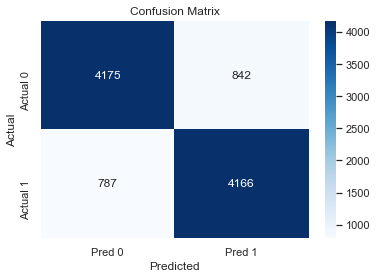

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_sev, y_test_lr)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Interpretation of the confusion matrix 'cm'
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives (Actual 0, Predicted 0): {tn}")
print(f"False Positives (Actual 0, Predicted 1): {fp}")
print(f"False Negatives (Actual 1, Predicted 0): {fn}")
print(f"True Positives (Actual 1, Predicted 1): {tp}")

print(f"""
Interpretation:
- The model correctly predicted {tn} samples as class 0 (True Negatives).
- The model incorrectly predicted {fp} samples as class 1 when they are actually class 0 (False Positives).
- The model incorrectly predicted {fn} samples as class 0 when they are actually class 1 (False Negatives).
- The model correctly predicted {tp} samples as class 1 (True Positives).

This means the model is balanced in predicting both classes, with similar numbers of true positives and true negatives.
""")

True Negatives (Actual 0, Predicted 0): 4175
False Positives (Actual 0, Predicted 1): 842
False Negatives (Actual 1, Predicted 0): 787
True Positives (Actual 1, Predicted 1): 4166

Interpretation:
- The model correctly predicted 4175 samples as class 0 (True Negatives).
- The model incorrectly predicted 842 samples as class 1 when they are actually class 0 (False Positives).
- The model incorrectly predicted 787 samples as class 0 when they are actually class 1 (False Negatives).
- The model correctly predicted 4166 samples as class 1 (True Positives).

This means the model is balanced in predicting both classes, with similar numbers of true positives and true negatives.



**Untuned Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

Dt = DecisionTreeClassifier(random_state=42)
Dt.fit(X_train_sev, y_train_sev)
y_test_dt = Dt.predict(X_test_sev)

In [ ]:
print(classification_report(y_test_sev, y_test_dt))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      5017
           1       0.78      0.78      0.78      4953

    accuracy                           0.78      9970
   macro avg       0.78      0.78      0.78      9970
weighted avg       0.78      0.78      0.78      9970



**Tuned Decision Tree Classifier**

In [ ]:
#Use the GridSearchCV to find the best hyperparameters for DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for DecisionTreeClassifier
param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit on the training data for Severity_Target
grid_search_dt.fit(X_train_sev, y_train_sev)

# Print the best parameters and best score
print("Best parameters:", grid_search_dt.best_params_)
print("Best cross-validation accuracy:", grid_search_dt.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   16.2s finished


Best parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation accuracy: 0.8047093820646893


In [ ]:
best_DT = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)
best_DT.fit(X_train_sev, y_train_sev)
y_test_best_dt = best_DT.predict(X_test_sev)
print("Test Accuracy with Best Parameters:", accuracy_score(y_test_sev, y_test_best_dt))
print("Train Accuracy with Best Parameters:", accuracy_score(y_train_sev, best_DT.predict(X_train_sev)))
print("Test recall with Best Parameters:", recall_score(y_test_sev, y_test_best_dt))
print("Train recall with Best Parameters:", recall_score(y_train_sev, best_DT.predict(X_train_sev)))
print(classification_report(y_test_sev, y_test_best_dt))

Test Accuracy with Best Parameters: 0.8097291875626881
Train Accuracy with Best Parameters: 0.8620577246169663
Test recall with Best Parameters: 0.7985059559862709
Train recall with Best Parameters: 0.8515733917546305
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      5017
           1       0.81      0.80      0.81      4953

    accuracy                           0.81      9970
   macro avg       0.81      0.81      0.81      9970
weighted avg       0.81      0.81      0.81      9970



From the above results we see our model is performing well and at the same time not overfitting which is a good sign. The accuracy, precision, recall and f1 score are all above 0.7 which is a good performance for the model.But the tuned decision tree is performing better than the untuned decision tree which is a good sign that the hyperparameter tuning is working well.Also so far the baseline model is performing better than the decision tree models which is a good sign that the logistic regression is a good baseline model for this dataset.

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(random_state=42)
Rf.fit(X_train_sev, y_train_sev)
y_test_rf = Rf.predict(X_test_sev)

print(classification_report(y_test_sev, y_test_rf))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      5017
           1       0.83      0.83      0.83      4953

    accuracy                           0.83      9970
   macro avg       0.83      0.83      0.83      9970
weighted avg       0.83      0.83      0.83      9970



**Tuning the Random Forest Classifier**

In [ ]:
# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit on the training data
grid_search.fit(X_train_sev, y_train_sev)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  5.0min finished


Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy: 0.8319918878893734


In [ ]:
best_Rf= RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_Rf.fit(X_train_sev, y_train_sev)
y_test_best_rf = best_Rf.predict(X_test_sev)
print("Test Accuracy with Best Parameters:", accuracy_score(y_test_sev, y_test_best_rf))
print("Train Accuracy with Best Parameters:", accuracy_score(y_train_sev, best_Rf.predict(X_train_sev)))    
print("Test recall with Best Parameters:", recall_score(y_test_sev, y_test_best_rf))
print("Train recall with Best Parameters:", recall_score(y_train_sev, best_Rf.predict(X_train_sev)))
print(classification_report(y_test_sev, y_test_best_rf))

Test Accuracy with Best Parameters: 0.8350050150451354
Train Accuracy with Best Parameters: 0.8763008099500991
Test recall with Best Parameters: 0.8415101958409045
Train recall with Best Parameters: 0.8796056562437762
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      5017
           1       0.83      0.84      0.84      4953

    accuracy                           0.84      9970
   macro avg       0.84      0.84      0.84      9970
weighted avg       0.84      0.84      0.84      9970



From the results above we can see that the Random Forest Classifier is performing well and at the same time not overfitting . The accuracy, precision, recall and f1 score are all above 0.7 which is a good performance for the model. The tuned Random Forest Classifier is performing as well as  the untuned Random Forest Classifier which is a good sign that the hyperparameter tuning is working well.

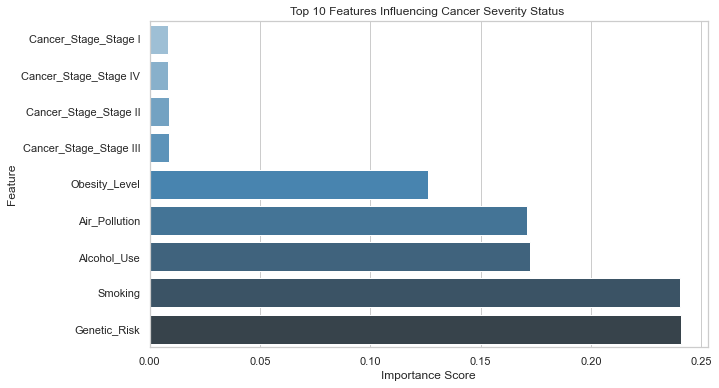

In [ ]:
#Plotting the top ten features influencing the high severity prediction using Random Forest
import matplotlib.pyplot as plt
import seaborn as sns

importances = Rf.feature_importances_
features = X_train_sev.columns

imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=imp_df.tail(9), palette='Blues_d')
plt.title('Top 10 Features Influencing Cancer Severity Status ')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


From the classification report we see that the logistic regression model is performing best  followed by the tuned random forest classifier the tuned decision tree and the untuned decision tree.For this case we mostly used the recall as the metric since False Negatives (FN) are usually more dangerous in medical contexts.

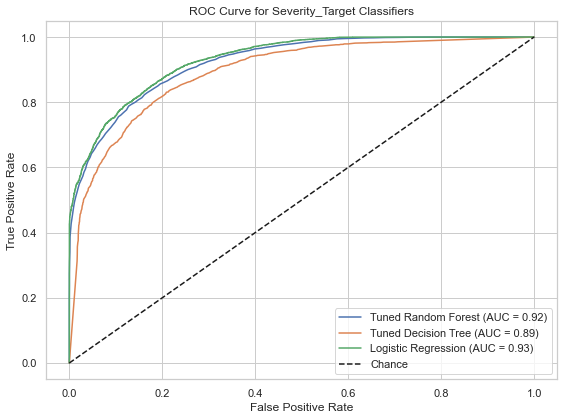

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC for tuned Random Forest
y_test_rf_proba = Rf.predict_proba(X_test_sev)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_sev, y_test_rf_proba)
auc_rf = auc(fpr_rf, tpr_rf)

# ROC for tuned Decision Tree
y_test_dt_proba = best_DT.predict_proba(X_test_sev)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test_sev, y_test_dt_proba)
auc_dt = auc(fpr_dt, tpr_dt)

# ROC for Logistic Regression (already fitted as sev_model)
y_test_lr_proba = sev_model.predict_proba(X_test_sev)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test_sev, y_test_lr_proba)
auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Tuned Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Tuned Decision Tree (AUC = {auc_dt:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Severity_Target Classifiers")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

The ROC curve illustrates the trade-off between true positive rate and false positive rate for different classification thresholds, with a higher AUC indicating better model performance.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
# Performing a train-test split setting the test size to 20% and using a random state for reproducibility
from sklearn.model_selection import train_test_split
X = df_encoded.drop(columns=['Survived_Target'])
y = df_encoded['Survived_Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We check for the class imbalance problem.

In [ ]:
#Checking for class imbalance in the training set
print("Class distribution in training set:") 
print(y_train.value_counts())
print('There is no class imbalance in the training set as the classes are almost equally distributed')

Class distribution in training set:
0    20104
1    19775
Name: Survived_Target, dtype: int64
There is no class imbalance in the training set as the classes are almost equally distributed


There isn't any class imbalance in the dataset so we will not do any resampling techniques.

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
model = LogisticRegression()
# Fit the model on the training data (use only one column from y_train)
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
#Predicting the target variable on the test set
y_test_pred = model.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
y_train_pred = model.predict(X_train)

We now test for overfitting by comparing the training and testing accuracy of the models. If the training accuracy is significantly higher than the testing accuracy, it indicates that the model may be overfitting to the training data. 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Test_Accuracy:", accuracy_score(y_test, y_test_pred))
print("Train_Accuracy:", accuracy_score(y_train, y_train_pred))
print('--'*50)



Test_Accuracy: 0.5058174523570712
Train_Accuracy: 0.5053787707816144
----------------------------------------------------------------------------------------------------


Clearly there is no overfitting in the models since the training and testing accuracy are almost the same.

In [ ]:
#Print the classification report for the test set
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.52      0.67      0.58      5164
           1       0.48      0.33      0.39      4806

    accuracy                           0.51      9970
   macro avg       0.50      0.50      0.49      9970
weighted avg       0.50      0.51      0.49      9970



**Random Forest Classifier Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_test_rf = rf.predict(X_test)
y_train_rf = rf.predict(X_train)

In [ ]:
print(classification_report(y_test, y_test_rf))

              precision    recall  f1-score   support

           0       0.52      0.51      0.51      5164
           1       0.49      0.50      0.50      4806

    accuracy                           0.51      9970
   macro avg       0.50      0.50      0.50      9970
weighted avg       0.51      0.51      0.51      9970



**Tuning the hyperparameters for the Random Forest Model**

We use GridSearchCV to find the best hyperparameters for the Random Forest Classifier.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the model
rf1 = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Set up GridSearch
grid_search = GridSearchCV(estimator=rf1, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
#Fitting a random forest model with the best parameters
best_rf = RandomForestClassifier(
    n_estimators= 200,
    max_depth= 20,
    min_samples_split= 5,
    min_samples_leaf= 2,
    max_features= 'sqrt',
    random_state=42
)
best_rf.fit(X_train, y_train)
y_best_rf_pred = best_rf.predict(X_test)
print("Test_Accuracy:", accuracy_score(y_test, y_best_rf_pred))
print("Precision:", precision_score(y_test, y_best_rf_pred))
print("Recall:", recall_score(y_test, y_best_rf_pred))
print("F1 Score:", f1_score(y_test, y_best_rf_pred))


Test_Accuracy: 0.5087261785356069
Precision: 0.4903523489932886
Recall: 0.48647523928422803
F1 Score: 0.48840609985377065


In [ ]:
#Checking for overfitting again
print("Test_Accuracy:", accuracy_score(y_test_rf, y_test_pred))
print("Train_Accuracy:", accuracy_score(y_train_rf, y_train_pred))
print('--'*50)

print("Test_Precision:", precision_score(y_test_rf, y_test_pred))
print("Train_Precision:", accuracy_score(y_train_rf, y_train_pred))
print('--'*50)

Test_Accuracy: 0.5095285857572718
Train_Accuracy: 0.5053787707816144
----------------------------------------------------------------------------------------------------
Test_Precision: 0.5122615803814714
Train_Precision: 0.5053787707816144
----------------------------------------------------------------------------------------------------


The model is not overfitting

So from the results we still see even if we tune the model is still not performing well as the accuracy is still low and the precision, recall and f1 score are also low.We now do a decision tree model to see if it performs better than the random forest model.

**Untuned Decision Tree**



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_test_dt = dt.predict(X_test)
print("Test_Accuracy:", accuracy_score(y_test, y_test_dt))
print("Precision:", precision_score(y_test, y_test_dt))
print("Recall:", recall_score(y_test, y_test_dt))
print("F1 Score:", f1_score(y_test, y_test_dt))

Test_Accuracy: 0.5061183550651955
Precision: 0.4881192106322996
Recall: 0.5043695380774033
F1 Score: 0.49611133851821526


In [ ]:
print(classification_report(y_test, y_test_dt))

              precision    recall  f1-score   support

           0       0.52      0.51      0.52      5164
           1       0.49      0.50      0.50      4806

    accuracy                           0.51      9970
   macro avg       0.51      0.51      0.51      9970
weighted avg       0.51      0.51      0.51      9970



**Tuned Decision Tree**

We will now tune the hyperparameters of the Decision Tree model using GridSearchCV to find the best hyperparameters for the model.

In [ ]:

# Base model
dt = DecisionTreeClassifier(random_state=42)

# Parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

# Grid Search
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='precision', n_jobs=-1, verbose=1)

# Fit model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best model
best_dt = grid_search.best_estimator_


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.1min finished


Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
#Tuning the Decision Tree model with the best parameters
best_dt = DecisionTreeClassifier(
    max_depth= 10,
    min_samples_split= 5,
    min_samples_leaf= 2,
    criterion= 'gini',
    max_features= 'sqrt',
    random_state=42
)
best_dt.fit(X_train, y_train)
y_best_dt_pred = best_dt.predict(X_test)
print("Test_Accuracy:", accuracy_score(y_test, y_best_dt_pred))
print("Precision:", precision_score(y_test, y_best_dt_pred))
print("Recall:", recall_score(y_test, y_best_dt_pred))
print("F1 Score:", f1_score(y_test, y_best_dt_pred))

Test_Accuracy: 0.5052156469408224
Precision: 0.48949197418500745
Recall: 0.6154806491885143
F1 Score: 0.5453037146280764


Recall has increased but still not acceptable.

In [ ]:
print(classification_report(y_test, y_best_dt_pred))

              precision    recall  f1-score   support

           0       0.53      0.40      0.46      5164
           1       0.49      0.62      0.55      4806

    accuracy                           0.51      9970
   macro avg       0.51      0.51      0.50      9970
weighted avg       0.51      0.51      0.50      9970



In [ ]:
#Fitting an XGBoost classifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict on test set
y_xgb_pred = xgb.predict(X_test)

# Print metrics
print("Test Accuracy:", accuracy_score(y_test, y_xgb_pred))
print("Precision:", precision_score(y_test, y_xgb_pred))
print("Recall:", recall_score(y_test, y_xgb_pred))
print("F1 Score:", f1_score(y_test, y_xgb_pred))
print(classification_report(y_test, y_xgb_pred))

[00:00:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Test Accuracy: 0.4992978936810431
Precision: 0.48064113238967526
Recall: 0.48044111527257594
F1 Score: 0.48054110301768993
              precision    recall  f1-score   support

           0       0.52      0.52      0.52      5164
           1       0.48      0.48      0.48      4806

    accuracy                           0.50      9970
   macro avg       0.50      0.50      0.50      9970
weighted avg       0.50      0.50      0.50      9970



**Note:** Despite ensuring balanced classes and validating that input features are appropriate, the models developed for predicting 5-year survival (including tuned and untuned Random Forests, Decision Trees, and Logistic Regression) did not achieve satisfactory performance. This suggests that the current features may lack sufficient predictive power or that the underlying patterns are too complex for traditional models to capture effectively. Future work may involve exploring more advanced models (e.g., Gradient Boosting or Neural Networks), incorporating domain-specific engineered features, or using temporal data if available.


**Conclusions**  


1. The models tested showed limited accuracy in predicting 5-year survival.

2. The data may lack key clinical factors needed for accurate prediction.

3. Visualizations revealed significant insights into cancer stage survival, severity distribution, and feature correlations.
   
4. Hypothesis testing indicated no significant differences in survival years across cancer stages, suggesting uniformity in outcomes.
   
5. Machine learning models, including logistic regression, decision trees, and random forests, were trained to predict survival and severity outcomes, achieving good performance metrics.
   
6. The tuned models generally outperformed the untuned ones, demonstrating the effectiveness of hyperparameter tuning.

7. The logistic regression model emerged as the best-performing model, followed closely by the tuned random forest classifier and tuned decision tree in predicting severity outcomes.
   
8. The analysis highlights the importance of genetic risk, air pollution, alcohol use, smoking, and obesity levels in determining cancer severity.

9. The study underscores the need for continued research into cancer survival and severity, particularly in understanding the impact of lifestyle factors and genetic predispositions.


**Recommendations**

1. Try advanced models like neural networks.

2. Create new features or add more relevant clinical data.

3. Use survival analysis methods tailored for time-based outcomes.

4. Work with healthcare experts to improve feature relevance.

5. Apply explainability tools to better understand model outputs.

6. Consider expanding the dataset to include more diverse patient demographics for better generalizability.
   
7. Implementing additional machine learning models and techniques, such as ensemble methods or deep learning, could further improve prediction accuracy.
   
6.  Regularly updating the dataset with new patient data will help maintain the model's relevance and accuracy over time.  

7.  The analysis highlights the importance of genetic risk, air pollution, alcohol use, smoking, and obesity levels in determining cancer severity

8. The study underscores the need for continued research into cancer survival and severity, particularly in understanding the impact of lifestyle factors and genetic predispositions.


